# simple regression modle using statsmodels

# step 1 : reading and under standing the data 


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r'C:\Users\user\Downloads\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


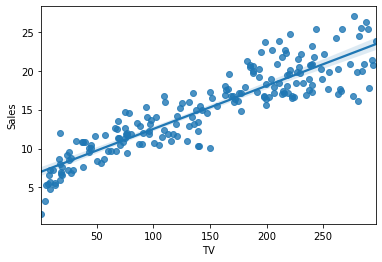

In [6]:
sns.regplot(x='TV',y='Sales',data=df)

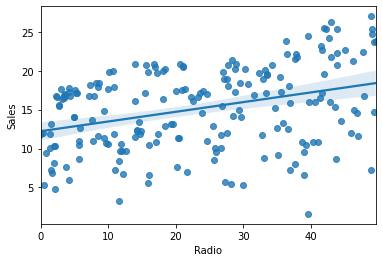

In [7]:
sns.regplot(x='Radio',y='Sales',data=df)

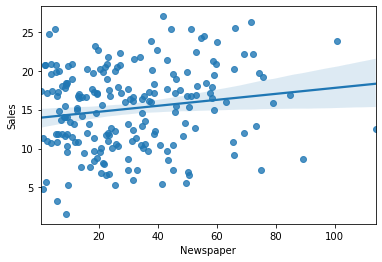

In [8]:
sns.regplot(x='Newspaper',y='Sales',data=df)

In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


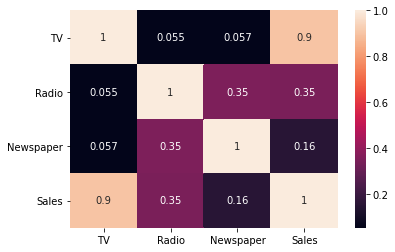

In [10]:
sns.heatmap(df.corr(),annot=True)

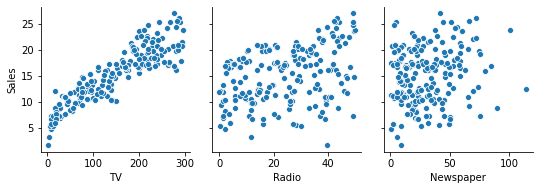

In [11]:
sns.pairplot(data=df,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

# step 2 : training the model

In [12]:
X=df['TV']
y=df['Sales']


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [14]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model=lr.fit()

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           1.52e-52
Time:                        10:34:51   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

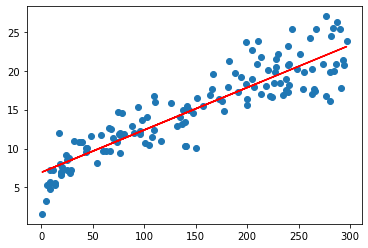

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.945+0.0545*(X_train),'r')
plt.show()


# step 3 : residual analysis
    - to check if the residuals are normally distributed and have mean equal to zero.
    - and residuals are indipendent of each other by plotting res with x-train
    






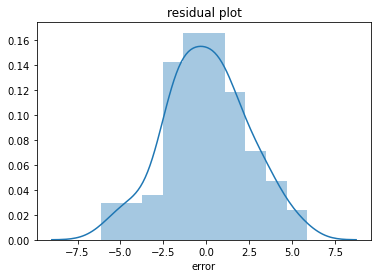

In [33]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sns.distplot(res)
plt.title('residual plot')
plt.xlabel('error')
plt.show()

## inference :
    - errors are normally distributed and have mean equall to zero
    

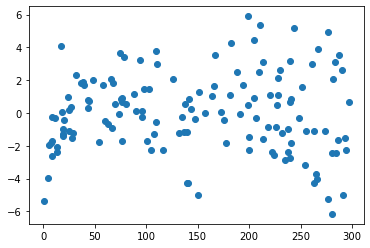

In [31]:
plt.scatter(x=X_train,y=res)

## there are no pattern and all the error seems to distribute around zero so simple linear regression modle can fit this problem

## step 4: evaluating the model

In [32]:
X_test_sm = sm.add_constant(X_test)

In [34]:
y_test_pred = lr_model.predict(X_test_sm)

In [40]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    R^2 (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), optional
        Sample weights.
    
    multioutput : string in ['raw_values', 'uniform_average', 'variance_weighted'] or None or array-like of shape (n_outputs)
    

In [42]:
r2_score(y_true = y_test,y_pred = y_test_pred)

0.7921031601245658

In [43]:
r2_score(y_true = y_train,y_pred = y_train_pred)

0.8157933136480389

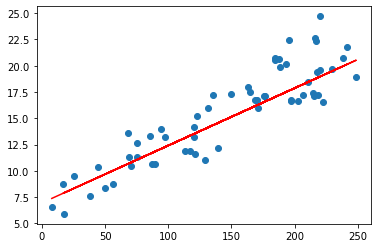

In [44]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

# simple linear regreassion model using sklearn

In [61]:
X_train_lr = X_train.values.reshape(-1,1)
# creating linear regression model

X_test_lr = X_test.values.reshape(-1,1)

In [50]:
lm = LinearRegression()
lm.fit(X_train_lr,y_train)


LinearRegression()

In [51]:
lm.coeff_

AttributeError: 'LinearRegression' object has no attribute 'coeff_'

In [53]:
lm.coef_

array([0.05454575])

In [56]:
lm.intercept_

6.948683200001357

In [65]:
y_train_pre = lm.predict(X_train_lr) 
y_test_pre = lm.predict(X_test_lr)
y_test_pre

array([ 7.37414007, 19.94148154, 14.32326899, 18.82329361, 20.13239168,
       18.2287449 , 14.54145201, 17.72692398, 18.75238413, 18.77420243,
       13.34144544, 19.46693349, 10.01415451, 17.1923756 , 11.70507285,
       12.08689312, 15.11418241, 16.23237035, 15.8669138 , 13.1068987 ,
       18.65965635, 14.00690363, 17.60692332, 16.60328147, 17.03419291,
       18.96511257, 18.93783969, 11.05597839, 17.03419291, 13.66326538,
       10.6796127 , 10.71234015, 13.5487193 , 17.22510305,  9.67597085,
       13.52144643, 12.25053038, 16.13418799, 19.07965865, 17.48692266,
       18.69783838, 16.53237199, 15.92145955, 18.86693021, 13.5050827 ,
       11.84143724,  7.87050642, 20.51966653, 10.79961336,  9.03233096,
       17.99419817, 16.29237067, 11.04506924, 14.09963141, 18.44147334,
        9.3759692 ,  7.88687015,  8.34505447, 17.72692398, 11.62325422])

In [63]:
r2_score(y_test,y_test_pre)

0.7921031601245662

In [66]:
r2_score(y_train,y_train_pre)

0.8157933136480389

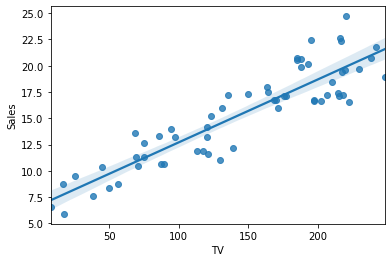

In [67]:
sns.regplot(X_test,y_test)

In [70]:
sns.regplot()

Help on function regplot in module seaborn.regression:

regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)
    Plot data and a linear regression model fit.
    
    There are a number of mutually exclusive options for estimating the
    regression model. See the :ref:`tutorial <regression_tutorial>` for more
    information.    
    
    Parameters
    ----------
    x, y: string, series, or vector array
        Input variables. If strings, these should correspond with column names
        in ``data``. When pandas objects are used, axes will be labeled with
        the series name.
    data : DataFrame
        Tidy ("long-form") dataframe where each column is a variable a